In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

In [3]:
raw_df = pd.read_csv("Zomato_Mumbai_Dataset.csv",delimiter="|")

raw_df.head(5)

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [4]:
raw_df.shape

(15081, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [6]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


# 4. Cleaning the Dataset

In [7]:
raw_df["PAGE NO"].tolist()

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 'PAGE NO',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 'PAGE NO',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 'PAGE NO',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 '101',
 'PAGE NO',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 '102',
 'PAGE NO',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 '103',
 'PAGE NO',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 '104',
 'PAGE NO',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 '105',
 

## a. Removing the redundunt rows of data

In [8]:
wrong_data = raw_df["PAGE NO"] == "PAGE NO"
wrong_data

0        False
1        False
2        False
3        False
4        False
         ...  
15076    False
15077    False
15078    False
15079    False
15080    False
Name: PAGE NO, Length: 15081, dtype: bool

In [9]:
raw_df = raw_df[~wrong_data] #in the dataset we got PAGE NO (Header) repeated multiple times in a row, i will remove it

In [10]:
raw_df["CITY"].unique()

array(['Mumbai', nan], dtype=object)

In [11]:
raw_df.drop(['URL','PAGE NO','CITY'], axis = 1,inplace=True) # we are removing the URL, Page No, City columns as it is of no use in the analysis. city column is removed because the dataset is for the city mumbai only

In [12]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


## b. Removing the Null Records

In [13]:
raw_df.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [14]:
raw_df[raw_df["PRICE"].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
raw_df = raw_df.drop(labels=15080,axis=0) # dropped the labels=15080th row

In [16]:
raw_df.fillna("NA",inplace=True)

In [17]:
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

## c. Converting the DataTypes of numerical columns to numeric dataype

In [18]:
raw_df["RATING"].value_counts()

RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [19]:
raw_df["RATING"].replace(to_replace=['-','NEW',"Opening"], value="0",inplace=True)

C:\Users\vignesh_s\AppData\Local\Temp\ipykernel_17748\3045885581.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [20]:
pd.set_option("display.max_rows", None)  # Show all rows
print(raw_df["VOTES"].value_counts())
pd.reset_option("display.max_rows")

VOTES
-          2360
NEW         953
4           364
5           320
6           288
7           277
8           258
10          224
11          206
13          187
9           183
12          179
14          173
17          149
15          148
16          133
21          132
18          124
25          124
19          109
22          109
23          105
20          103
24          100
29           99
27           96
26           92
40           90
30           90
35           84
28           83
31           78
34           76
39           75
32           70
44           68
33           67
37           67
36           65
43           62
55           59
41           58
Opening      57
38           56
63           52
50           51
47           50
53           50
51           50
42           49
45           49
49           47
48           46
46           46
54           44
67           44
52           44
59           44
61           42
56           42
58           41
69           41
60

In [21]:
raw_df["VOTES"].replace(to_replace=["-","NEW","Opening"],value='0',inplace=True)

C:\Users\vignesh_s\AppData\Local\Temp\ipykernel_17748\3333215319.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [22]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             14138 non-null  object
 1   PRICE            14138 non-null  object
 2   CUSINE_CATEGORY  14138 non-null  object
 3   REGION           14138 non-null  object
 4   CUSINE TYPE      14138 non-null  object
 5   TIMING           14138 non-null  object
 6   RATING_TYPE      14138 non-null  object
 7   RATING           14138 non-null  object
 8   VOTES            14138 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [23]:
raw_df["PRICE"] = raw_df["PRICE"].astype("int64")
raw_df["RATING"] = raw_df["RATING"].astype("float64")
raw_df["VOTES"] = raw_df["VOTES"].astype("int64")

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


## d. Working with 'Timing' column

In [25]:
raw_df["TIMING"].value_counts()

TIMING
11am to 11pm(Mon-Sun)                              1192
11am to 12midnight(Mon-Sun)                         632
12noon to 12midnight(Mon-Sun)                       467
11am to 1130pm(Mon-Sun)                             309
10am to 10pm(Mon-Sun)                               267
                                                   ... 
1130am to 4pm,630pm to 1230AM...                      1
12midnight to 5am,12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM,12noon to 4pm,7pm to ...         1
12noon to 330pm,630pm to 12midnight...                1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: count, Length: 2551, dtype: int64

In [26]:
temp_df = raw_df["TIMING"].str.split("(",n=1,expand=True)
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [27]:
raw_df["TIMING"] = temp_df[0]
raw_df["DAYS_OPEN"]= temp_df[1]

In [28]:
raw_df["DAYS_OPEN"] = raw_df["DAYS_OPEN"].str.replace(')','')

In [29]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun


In [30]:
raw_df.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [31]:
raw_df.fillna("NA",inplace=True)

In [32]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


## e. Removing the restaurant records whose Rating or Votes is 0

In [33]:
useless_data = (raw_df["RATING"]==0.0) | (raw_df["VOTES"]==0)
raw_df[useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0.0,0,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0.0,0,Mon-Sun


In [34]:
raw_df = raw_df[~useless_data]

## f. Working on 'RATING_TYPE' Column

In [35]:
raw_df["RATING_TYPE"].value_counts()

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
Ortalama            2
Bueno               2
İyi                 2
Buono               2
Dobré               2
Bom                 2
Priemer             2
Průměr              2
Muito Bom           2
Promedio            2
Muy Bueno           1
Sangat Baik         1
Média               1
Biasa               1
Skvělé              1
Baik                1
Çok iyi             1
Excelente           1
Velmi dobré         1
Media               1
Name: count, dtype: int64

In [36]:
raw_df["RATING_TYPE"].str.replace('Excelente',"Excellent") #one Method

#Other Methods

raw_df['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)

In [37]:
raw_df['RATING_TYPE'].value_counts()

RATING_TYPE
Average      5115
Good         4347
Very Good    1148
Excellent      95
Poor           57
Very Poor       4
Excelente       1
Name: count, dtype: int64

## g. Working on 'REGION' Column


In [38]:
raw_df['REGION'].value_counts()

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Hotel Emerald-- Juhu                   1
Trident-- Bandra Kurla Complex         1
Sea Princess-- Juhu                    1
Aureole Hotel-- Andheri East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [39]:
raw_df['REGION'] = raw_df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)

In [40]:
raw_df['REGION'].value_counts()

REGION
Thane West           712
Mira Road            412
Andheri West         407
Malad West           316
Bandra West          282
                    ... 
Andheri East           2
CBD Belapur            1
Girgaon Chowpatty      1
Goregaon               1
Dadar                  1
Name: count, Length: 120, dtype: int64

In [41]:
raw_df['REGION'] = raw_df['REGION'].str.replace(' West| west| East| east','',regex=True)

In [42]:
raw_df['REGION'].value_counts()

REGION
Thane                726
Mira Road            412
Andheri              409
Malad                378
Kandivali            377
                    ... 
Flea Bazaar Café       3
Majiwada               3
Panvel                 2
CBD Belapur            1
Girgaon Chowpatty      1
Name: count, Length: 101, dtype: int64

In [43]:
raw_df['REGION'] = raw_df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kamothe','Sion',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

raw_df['REGION'] = raw_df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Andheri',regex=True)


In [44]:
raw_df['REGION'].value_counts()

REGION
Thane           770
Andheri         765
Mira Road       412
Malad           378
Kandivali       377
               ... 
Malabar Hill     14
Sewri            12
Alibaug          10
Gorai             7
Peddar Road       4
Name: count, Length: 80, dtype: int64

## h. Removing Duplicate records

In [45]:
raw_df[raw_df.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [46]:
raw_df = raw_df.drop_duplicates()

## 4. Copying the cleaned data into a new DataFrame

In [47]:
zomato_df = raw_df.copy()

In [48]:
zomato_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


## 5. Performing Exploratory Data Analysis

## Q1) How many restaurants are in Mumbai for each type of cuisine?

In [49]:
!pip install -U kaleido

In [50]:

# fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',
#  title= 'No. of Restaurants by Cuisine Type',
#  labels={'CUSINE TYPE':'Cuisine Type'})
# fig.show()


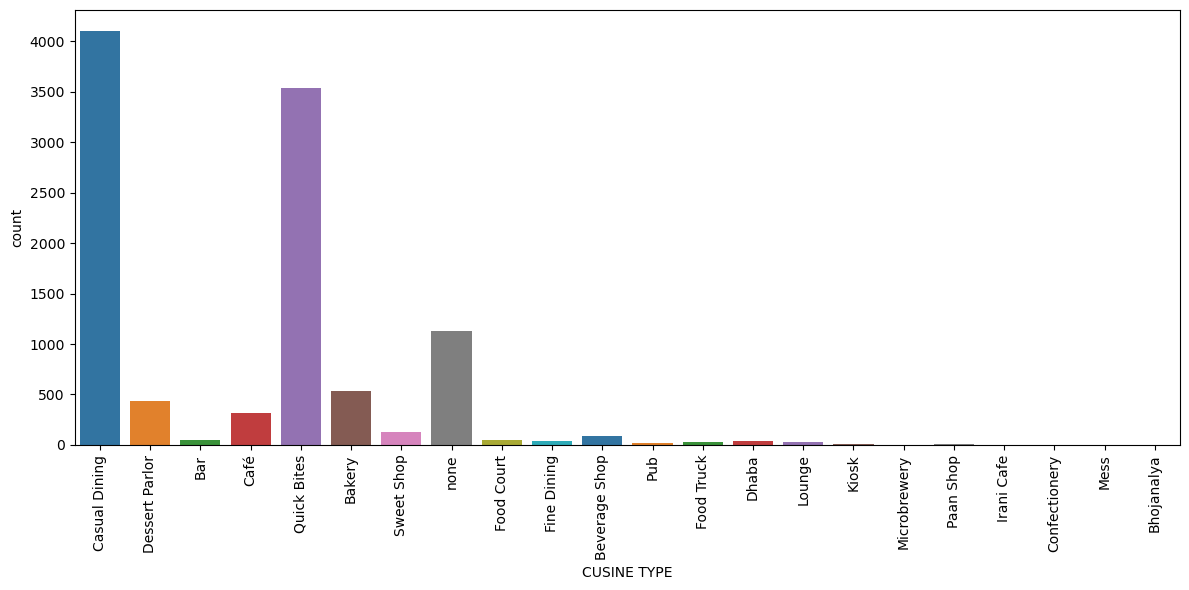

In [60]:
plt.figure(figsize=(12,6))
ax = sns.countplot(zomato_df, x="CUSINE TYPE", hue='CUSINE TYPE', palette="tab10")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Q2) What are the percentage of restaurants by Rating Type in Mumbai?

In [52]:
rating_type_df = zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df

,RATING_TYPE,count
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,95
4,Poor,56
5,Very Poor,4
6,Excelente,1


In [53]:
rating_type_df.rename(columns={'index':'RATING TYPE', 'count':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,RATING_TYPE,COUNT OF RESTAURANTS
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,95
4,Poor,56
5,Very Poor,4
6,Excelente,1


([<matplotlib.patches.Wedge at 0x224c93a6930>,
 [Text(0.09506430455105412, 1.0958844729259671, 'Average'),
  Text(-0.5021462950251083, -0.9786976542285963, 'Good'),
  Text(0.9980244525471784, -0.46254425963134055, 'Very Good'),
  Text(1.0977029501059832, -0.07105092067398906, 'Excellent'),
  Text(1.0997874453262482, -0.021623484981954277, 'Poor'),
  Text(1.0999982436087605, -0.001965720641963474, 'Very Poor'),
  Text(1.099999951259433, -0.00032745876885039707, 'Excelente')])

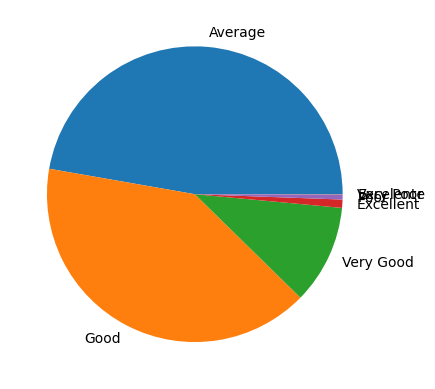

In [59]:
# fig = px.pie(rating_type_df, names='RATING_TYPE', values='COUNT OF RESTAURANTS', color='RATING_TYPE',
#  title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

plt.pie(rating_type_df["COUNT OF RESTAURANTS"],labels=rating_type_df.RATING_TYPE)

## Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?

In [62]:
seafood_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am",Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,"12noon to 330pm,7pm to 1am",Excellent,4.5,573,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,12noon to 1am,Excellent,4.5,100,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM",Excellent,4.5,497,Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,"12noon to 6pm,7pm to 12midnight",Excellent,4.5,2068,Mon-Sun
903,Ferry Wharf,1500,"Seafood,Mangalorean",Bandra,Casual Dining,"11am to 330pm,7pm to 1230AM",Very Good,4.4,459,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane,Casual Dining,"1130am to 330pm,6pm to 1130pm",Very Good,4.4,662,Mon-Sun


## Q4) Which is the best Food Truck in Mumbai?

In [63]:
foodtruck_df = zomato_df[zomato_df['CUSINE TYPE'] == 'Food Truck']
foodtruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun


## Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?

In [67]:
highest_rated_df = zomato_df[zomato_df['RATING'] >= 4.5]
highest_rated_df.sort_values(by="RATING",ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
10669,Trumpet Sky Lounge,1700,"North Indian,Chinese",Andheri,Lounge,6pm to 130am,Excellent,4.9,348,Mon-Sun
149,The Northern Vibe,300,"Momos,Rolls,Fast Food",Powai,Quick Bites,12noon to 1130pm,Excelente,4.8,145,"Mon-Thu,12noon to 12midnight..."
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
66,Downtown China,750,"Chinese,Thai",Andheri,Casual Dining,12noon to 12midnight,Excellent,4.8,162,Mon-Sun
9778,Rajdhani,950,"Gujarati,Rajasthani,North Indian",Ghatkopar,Casual Dining,"12noon to 330pm,7pm to 11pm",Excellent,4.8,1451,Mon-Sun
901,Big Bang Cuurry,350,"North Indian,Biryani,Rolls",Andheri,none,"12noon to 330pm,7pm to 2am",Excellent,4.7,227,Mon-Sun
824,Blend N Brew,1600,"North Indian,Chinese,American",Navi Mumbai,Casual Dining,12noon to 1130pm,Excellent,4.7,56,Mon-Sun
626,Hotel Sagar,500,"North Indian,Chinese,Beverages",Chakala,Casual Dining,8am to 12midnight,Excellent,4.7,40,Mon-Sun
3554,Smoke House Deli,1400,"European,Italian,Salad,American,Burger,Juices,...",Bandra,Casual Dining,7am to 1am,Excellent,4.7,3161,Mon-Sun


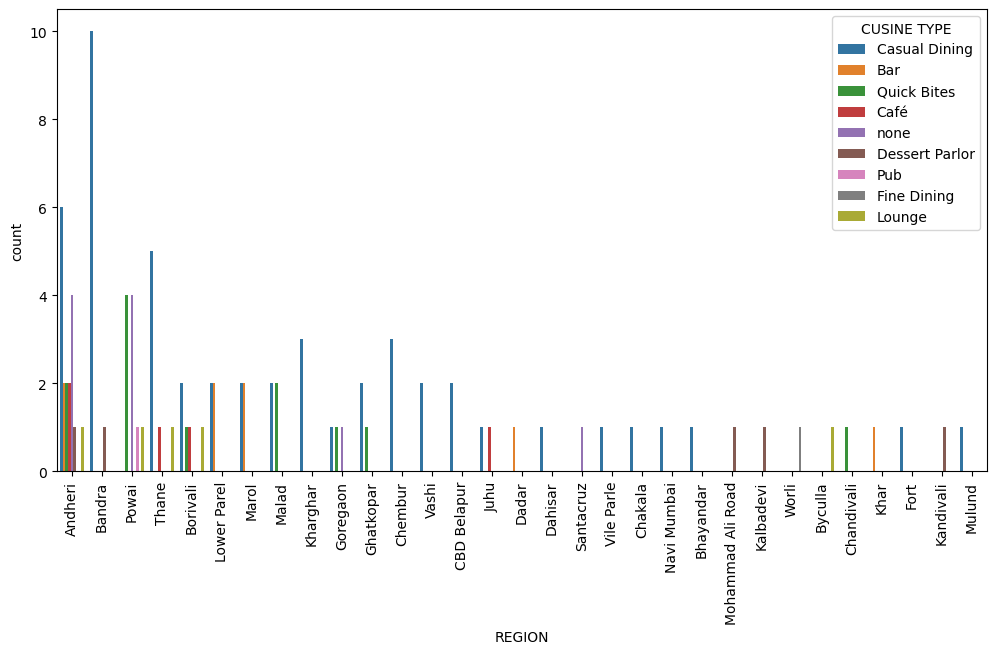

In [89]:
# sns.countplot(x="REGION",data=highest_rated_df,hue="REGION")
plt.figure(figsize=(12, 6))
sns.countplot(x="REGION", hue="CUSINE TYPE",data=highest_rated_df, 
              order=highest_rated_df['REGION'].value_counts().index
             )
plt.xticks(rotation=90);